# Peeling back the curtain

Statistics (of which machine learning is one part) is all about being able to make inferences about how the world works, given some data. In essence, trying to peel back the curtain on what is unknown. To be able to do that, we need a way to talk about what data are, and a way to talk about what could be behind that curtain.

## Talking about data

Let's say we observe 1000 patients in a hospital, each of whom has measurements of their pre-treatment blood pressure, heart rate, etc. and also their corresponding blood pressure after taking a drug. For a new patient who walks in the door, given their current vital signs, can we predict their post-treatment blood pressure? 

We need a way to talk abstractly about the data in these kinds of problems so that we can apply the same methods to different problems without having to completely rethink our approach every time.

We're going to use a subscript $i$ to refer to data about the $i$th patient. So, for example, if $z$ were some measurement we made on all patients, $z_i$ would be the value of that measurement for the $i$th patient. The patient in our example is what we call the **unit of observation**. But if we were talking about classifying pictures as having cats or not having cats in them, the unit of observation would be the picture. So, in general, the subscript $i$ refers to the $i$th observation in the dataset, which could be a patient, a photograph, a credit card transaction, etc. 

The total number of observations is usually called $n$, so $i$ could stand for any number between 1 and $n$. A shorter way to write that is $i \in \{1, 2, \dots n\}$. You can read $\in$ as "in", so this says "$i$ is a number in the set of numbers that includes 1, 2, ... all the way up to $n$". We'll use that notation for other things as well.

We usually use the variable $y$ to refer to the measurement we are trying to predict, which is in this case the patient's post-treatment blood pressure. You'll most often see $y$ called the **target**, **label**, or **outcome**. Using our observation subscripts, $y_1$ would be the first patient's post-treatment blood pressure, $y_2$ would be the second patient's blood pressure, etc. 

We can do the same thing for the other measurements, which are called **predictors**, **features**, or **covariates**. We could use different letters for each predictor, e.g. pre-treatment blood pressure would be $z$, pre-treatment heart rate would be $x$, but the standard practice is to call them all "$x$", but subscript them with an index $j$ (different than the index $i$ that refers to the unit of observation). So, in our example, we'll say $x_{i1}$ is patient $i$'s pre-treatment blood pressure, $x_{i2}$ is their pre-treatment heart rate, etc. We will use $p$ to refer to the number of predictors we have for each observation, so $j \in \{1 \dots p\}$. We'll use $x_i$ to refer to a list of all of the features for observation $i$:

$$
x_i = 
\left[
\begin{array}{cccc}
x_{i1} & x_{i2} & \cdots & x_{ip}
\end{array}
\right] 
$$


Now each observation is decribed by its target $y_i$ and its vector of predictors $x_i$. We stack these measurements together into lists of outcomes and predictors so we can refer to all of them at once:

$$
X = 
\left[
\begin{array}{c}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{array}
\right] 
=
\left[
\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} 
\end{array}
\right]
\quad
Y = 
\left[
\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{array}
\right] 
$$

You may recall that ordered lists of numbers are also called vectors, and a list of lists of numbers (like $X$) can be written as a matrix. These are the terms we'll use going forward. 

Note that each column of $X$ (which we'll call $x_{:j}$) is a vector that contains every measurement of the $j$th feature.

Now we can formalize our learning problem in the abstract. All the measurements for the existing patients are contained in the matrix of predictors $X$ and the vector of targets $Y$. A new patient walks in the door (patient #$n+1$), and we measure all their predictors $x_{n+1}$. What we don't observe, but want to estimate, is the value of their target, $y_{n+1}$.

### Example in Code

We'll make some fake data in python to demonstrate. Here are all the predictors and outcomes for $n$ observations (e.g. pre-treatment measurements and post-treatment blood pressure for $n$ patients):

In [1]:
import numpy as np
n = 5 # 5 observations
p = 2 # 2 features
X = np.random.rand(n,p) # a random matrix of numbers between 0 and 1. 
Y = np.random.rand(n)
X, Y

(array([[0.81094339, 0.96272971],
        [0.77415282, 0.52292862],
        [0.21573058, 0.3560294 ],
        [0.31277915, 0.19894063],
        [0.34099537, 0.31323508]]),
 array([0.65463807, 0.39945426, 0.9418224 , 0.03021903, 0.88351023]))

And here are the predictors for a new observation (e.g. the pre-treatment measurements for a new patient)

In [2]:
x_new = np.random.rand(1,p)
x_new

array([[0.18023264, 0.55885409]])

What we want is an algorithm that takes any values of `x_new` and uses all the data in `X` and `Y` to output an prediction for what `y_new` should be:

In [3]:
def fancy_machine_learning_prediction(x_new):
    # ... do some stuff with X and Y
    return y_new_estimated

In [4]:
### Aside about non-tabular data, feature engineering, and methods for nontabular data

## What's behind the curtain?

In the example above, we demonstrated some code that generates fake data $X$ and $Y$. On the other hand, real data comes from the real world, not from some python code. For every dataset, there is an immensely complex network of causal interactions that ultimately "produces" the data. 

For example, in our blood pressure example, a patient's pre-treatment vital signs are caused by their physiological state: their genetics, life history, what they ate for breakfast that morning, whether or not they just ran up a flight of stairs, and so on and so forth. Taking a drug influences the levels of certain chemicals in the blood, which are taken up at particular rates in certain organs by certain enzymes, the levels of which are impacted by the patient's genetics and prior physiological state, which was influenced by their life history, etc. Thus the impact of the drug on cellular processes is mediated by these factors. The cells respond by increasing or decreasing their production of some proteins or metabolites, which, in combination with the immediate condition of the patient when the measurement is taken, determines the post-treatment blood pressure. 

Or, let's say we're trying to determine whether or not there is a cat in a photograph. The cat being in front of the camera when the photo was taken ($y_i$) could be caused by a huge number of factors, and the values of the pixels in the photograph ($x_i$) are caused by the reflection of photons emitted from sources of light off the cat (and other objects) and the mechanics of the detection of light inside the camera.

In a nutshell, the world is complicated. There is no way that mere mortals could ever write code accurate enough to perfectly simulate the exact processes that produce data about complex real-world phenomena.

But, despite the complexity, you should start thinking about that complex web of causality as "code" that's being run in some cosmic simulation. Maybe you can imagine that there are "data gods" that write and are running this code. We'll never see their code, and we'll never be able to understand it, but somewhere, out there, that metaphysical code is running, and it's generating the observations that we see in our data.

You can think of that code as a little "factory" that pumps out observations of $x_i$ and $y_i$, one at a time. The factory is behind a curtain that we can't ever look behind, but we can see the pile of $x_i$s and $y_i$s that come out of it, which are our $X$ and $Y$.

![](factory.png)

If we had that code, we'd be able to reverse engineer it to predict $y_i$ given $x_i$ as accurately as would be 
possible with those predictors. In practice, however, we can only build a *model* of that code. Our model will never capture the complexities of reality, the same way that a model plane doesn't even begin to approach the complexity of a real aircraft. But, ideally, it will be similar enough in ways that are important for the task at hand: if we're using a model plane just to demonstrate what an aircraft migth look like, we don't need the model to have functioning jet engines. And if all we need to do is predict $y_i$ for a new $x_i$, we don't exactly need to understand the complex web of causality linking the two together.

We do, however, need a way to talk about the relationship that $x_i$ and $y_i$ might have. And to do that, we need a way to talk abstractly about the "code" or "data factory" that's behind the curtain, the same way we developed abstract terms to describe our data. Thankfully, the language of probability works perfectly for that.

## Random variables are factories that generate data

The data factories we're interested in are the kind that output $x_i$s and $y_i$s, but to understand how these factories work it's better to consider a simpler factory that produces one number at a time, instead of one vector $x_i$ and one number $y_i$. 

We'll call our factory $\mathbf Z$. This factory pushes out one value $z_i$ at a time. Furthermore, let's say that half the time you get a $1$ and half the time you get a $0$; those are the only values that the $\mathbf Z$ factory can produce. And the factory is built to reset itself between producing each value, so whatever $z_i$ is has no impact on $z_{i+1}$.

In the language of probability theory, $z_i$ are **realizations** from $\mathbf Z$, which has a **distribution**:

$$
\begin{array}{rcl}
P(\mathbf Z = 0) &=& 1/2 \\ 
P(\mathbf Z = 1) &=& 1/2
\end{array}
\quad \quad \text{or} \quad \quad
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

What we've been loosely calling a "factory" is a **random variable** in the language of probability theory. But that's just a name. You can keep thinking of them as factories, or code, that generate data. The different values that can be realized are each called possible **events**.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
Random variables are often written in uppercase, (e.g. Z) and their realizations in lowercase (z). We're going to be using uppercase for matrices (and sets), so I'm going to use boldface in conjunction with uppercase ($\mathbf Z$) to denote random variables.
</div>

Ok, so if the random variable is a factory, and the realizations of the random variable are the output of that factory (the data we get to see), then how do we read a statement like $P(\mathbf Z = 0) = 1/2$? Well, that just means that the value $z$ that $\mathbf Z$ produces is $0$ half of the time. But what exactly do we mean by "half the time"? While we usually don't have to think deeper than this, you'll see later that it is sometimes necessary to have a more rigorous definition of probability.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Remember that the entire purpose of talking about these factories is so that we can imagine what's behind the curtain, producing the data that we observe. Think of a real-world scenario where we collect data that we could imagine that our random variable $\bf Z$ is producing. In other words, what's something we could measure in the real world that we might model using $\bf Z$?
    
</div>

Let's build that definition. We'll start with some raw materials. All factories have raw materials that go into them, which end up being turned into the finished product. In a similar way, random variables have inputs which get mapped to realized values. We'll call them "data ore": the unrefined precursor that gets transformed by our factory (random variable $\mathbf Z$)into the data product $z$. The data ore exists in units (data ore nuggets). The factory takes one nugget at a time and transforms it into a realization.

The nuggets are kept in an big silo called $\Omega$ before they go to $\mathbf Z$. This silo is filled to the brim with *all* of the possible nuggets that could be fed into the factory, one of each of them. It's also a magic silo, so when you take out a nugget, another one exactly like it is mined out of the depths of the cosmos to take its place in the silo.

![](factory_rv.png)

Each nugget is gets transformed into a value of $z$, but the process isn't random. For instance, if a nugget named "Karl" turned into a 1 when fed through $\mathbf Z$, then we would *always* get a 1 when Karl goes into $\mathbf Z$. But we know that sometimes $\mathbf Z$ produces 0s, so there must be other nuggets whose destiny is to become 0s, just like Karl's destiny is to be a 1. The "randomness" in $\mathbf Z$ isn't caused by what's in the factory, it's caused by randomly picking a nugget to throw into it.

We can even code up our little example, imagining that we have 10 nuggets, boringly named "0", "1", "2"... "9":

In [5]:
def Z(ω): # factory (random variable)
    if ω in set([1,4,5,8,9]): # these are the outcomes (nuggets) that map to the value 1 
        return 1
    if ω in set([0,2,3,6,7]): # these are the outcomes (nuggets) that map to the value 0 
        return 0
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) # sample space (silo) of outcomes (ore nuggets) attached to Z
    
import random
def realize(rand_var): # run the assembly line!
    ω = random.sample(rand_var.Ω, 1)[0] # grab a single nugget out of the silo at random
    return rand_var(ω) # push it through the factory

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 
`random.sample(x,n)` grabs `n` values at random out of the set `x` and returns them as a list.
</div>

Here are 20 observations $z=[z_1, z_2, \dots z_{20}]$, fresh off the assembly line of the $\mathbf Z$ factory:

In [6]:
z = [realize(Z) for i in range(20)] 
z

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]

Now we're ready to define probability: the probability of an event (a particular value $z$) is just the proportion of the silo that's taken up by nuggets that are destined to become that value $z$ when fed through $\mathbf Z$. That's it. We denote that proportion with the notation $P(\mathbf Z = z)$. In our example above, saying $P(\mathbf Z = 1) = 1/2$ means that half of all the possible nuggets that could go into $\mathbf Z$ would produce a 1.

That's a definition we can code up:

In [7]:
def P(rand_var, realization):
    A = set(ω for ω in rand_var.Ω if rand_var(ω) in realization) # what are all the nuggets that map to the value(s) in question?
    return len(A)/len(rand_var.Ω) # what is the "volume" of those nuggets relative to the volume of the silo Ω?

In [8]:
P(Z,[0]), P(Z,[1]) # P(z=0), P(z=1)

(0.5, 0.5)

So to build a factory that makes 0s and 1s in even proportions, all I had to do was evenly split up the number of nuggets that are destined to produce each value. It also doesn't matter what I call the nuggets. For example, here is equally good code to implement $\mathbf Z$:

In [9]:
def Z(ω): # factory (random variable)
    if ω in set([-1234]): # these are the outcomes (nuggets) that map to the value 1 
        return 1
    if ω in set([980123]): # these are the outcomes (nuggets) that map to the value 0 
        return 0
Z.Ω = set([980123, -1234]) # sample space (silo) of outcomes (ore nuggets) attached to Z

[realize(Z) for i in range(20)] 

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Write code for a new random variable $\mathbf W$ that behaves like this:
    
$$
P(\mathbf W=w) =
\begin{cases}
0.1 \dots  & \text{for }w=-1 \\
0.4 \dots & \text{for }w=0 \\
0.2 & \text{for }w=1 \\
0.3 & \text{for }w=2
\end{cases}
$$
    
You'll need to make your own nugget silo `Ω` and define the function `W(ω)`. Test it out using the `realize()` and `P()` functions we wrote. Use `P()` to calculate $P(\mathbf W \in \{-1,0\})$.
    
</div>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTCXQ098kIFldwWw8VEPSR_q9Tbk1BFjuhFH8V8NVPskxrtVj7&s)

If you're looking at this and thinking that I can't possibly be serious, that the foundations of statistics and machine learning can't possibly be built up from imagining data factories and magical silos... well, you're wrong. Sure, I've concocted a somewhat elaborate metaphor, but it's a metaphor that accurately describes how these otherwise very abstract concepts relate to each other. If you can look at something like $P(\mathbf Z = z) := P(\{\omega \in \Omega \vert \mathbf Z(w)=z\})$ and immediately come away with an understanding of what that means, all the more power to you. But I don't. At least not without first building up an intuition for each of the components.

In probability theory, the silo $\Omega$ is called a **sample space** and the data ore nuggets are called **outcomes** (not to be confused with what we call the variable we want to predict in machine learning). A random variable $\mathbf Z$ is defined as a function that maps an element of $\Omega$ to a realization $z$. The probability of an event $z$ is the *measure* (volume, or proportion of total volume) of the set of outcomes (data ore nuggets) that map to $z$ (are destined to be transformed to $z$ by $\mathbf Z$). 

![](prob_preimage.png)

When I talk about these things outside of the context of explaining them, I do call them by their real names (e.g. random variable, sample space, etc.) because that's what people have called them for nearly a century. But when I close my eyes and *reason* about these concepts, I'm thinking about something tangible, like a factory. As we go on I'm going to introduce more mathematical notation as we need it, and I'm going to wean off the factory metaphor, but I encourage you to keep building your intuition about these concepts instead of thinking about them as abstract symbols on a page. The symbols are just a convenient shorthand for the ideas. The only reason to know the standard names and symbols is to be able to read and understand what others have written. If you find yourself skimming over an equation- stop. Read it slowly and think about what each part means.

So now that we're here, let's demystify the notation in that equation I dropped up above! Here it is again:

$$P(\mathbf Z = z) := P(\{\omega \in \Omega \vert \mathbf Z(w)=z\})$$

To start, the $:=$ means "the thing on the left is defined as the thing on the right". So we're saying that when we write "$P(\mathbf Z = z)$", we really mean whatever "$P(\{\omega \in \Omega \vert \mathbf Z(w)=z\})$" is. Ok, next up is [set-builder notation](https://www.mathsisfun.com/sets/set-builder-notation.html): you can read $\{a\in A | f(a) = 1\}$ as "the collection of all the elements $a$ in the set $A$ *such that* $f(a)=1$". So $\{\omega \in \Omega \vert \mathbf Z(w)=z\}$ is the set of outcomes $\omega$ that become $z$ when passed through the random variable $\mathbf Z$. Finally, we have $P()$, which is the [probability measure](https://en.wikipedia.org/wiki/Probability_measure). We won't define this super rigorously, but it is basically defined as the measurement of the proportion of all of the outcomes in $\Omega$ that are contained in the subset $\{\omega \in \Omega \vert \mathbf Z(w)=z\}$. If you put all of that together, you'll see that it's exactly the same as the definition we put together using our factory analogy. 

When we say "the proportion of all outcomes in $\Omega$ that are in a subset $A$", what we mean is that we're literally going to measure the volume of space that the nuggets in $A$ take up in the silo $\Omega$. By convention, we say that $\Omega$ has volume 1 so that the volume of $A$ is also the proportion of volume that $A$ takes up in $\Omega$. In the figure above, that's represented by the area of the shaded gray region.

<div class="alert alert-block alert-warning">
<b>REMEMBER:</b> 

If your eyes glaze over every time you see mathematical notation, don't worry. Remember, that's normal. Just slow down and read it again. Try and think about what it <i>means</i>.
</div>

Ok- I promised that it would be useful to define probability in a more rigorous way than "$z$ happens $x$% of the time". Now we're going to see why. 

To start with, let's "derive" a relatively simple fact: for a subset $F \subset \Omega$, $P(F) \in [0,1]$. This is a compact way of writing that for any subset of outcomes, the proportion of outcomes in that subset relative to how many are in the whole sample space is a number between 0 and 1 ($A \subset B$ means that $A$ is a subset of $B$). At this point, that should be obvious to you. If the volume of our silo $\Omega$ is 1, the volume of any subset of that has to be less than 1.

Here's a trickier one: for $A,B \subset \Omega$, if $A \cap B = 0$, then $P(A \cup B) = P(A) + P(B)$. This one has more symbols, but it's also really obvious when you know what they mean. $A \cap B$ is read as "the intersection of the sets $A$ and $B$", which is the set of elements that are in both sets. It's the middle part of a Venn diagram. $A \cup B$ is read  as "the union of $A$ and $B$", which is all of the elements in either set- that's the entirety of the Venn diagram. So what we're saying here is that if A and B don't share any outcomes between them, the probability of the union of the two is the same as the sum of the probabilities of each of them. 

That also seems cryptic until you think about it in terms of quantities of ore nuggets that produce certain values when fed through the factory. If you take all the ore nuggets that end up becoming the value $a$ (call that set of nuggets $A$), and all the nuggets that end up becoming the value $b$ (call that $B$), then the total volume that end up becoming either $a$ or $b$ (that's $P(A \cup B)$) is the sum of the volumes that become $a$ (that's $P(A)$) and those that become $b$ (that's $P(B)$). 

Note that this only holds for sets $A$ and $B$ that don't overlap ($A\cap B = 0$). For instance, if $A= \{\omega \vert \mathbf Z(\omega) \in \{0,1\}\}$ (all the outcomes that map to either 0 or 1) and $B = \{\omega \vert \mathbf Z(\omega) = 0\}$ (all the outcomes that map to 0), every element of $B$ is also an element of $A$, so the volume of the union $A \cup B$ is the volume of $A$, which is not the volume of $A$ plus the volume of $B$.

We can even use our code from before to demonstrate this:

In [10]:
A = set([0])
B = set([1])
P(Z,A) + P(Z,B) == P(Z,A|B) # in python, set union ∪ is written | because an element is in A∪B if it is in A OR B (A|B)

True

In [11]:
A = set([0,1])
B = set([0])
P(Z,A) + P(Z,B) == P(Z,A|B)

False

This last point brings up the fact that we can also talk about quantities like $P(\mathbf Z \in F)$, where $F$ is some set of possible events, like $\{0,1\}$. That's more general than the probability of a single event $z$: $P(\mathbf Z = z)$. All we need to do is count up the volume of all the nugets that produce any of the values that are in $F$, instead of just the nuggets that produce $z$. Our code is already set up to do that- we used it to calculate `P(Z, set([0,1]))`.

<div class="alert alert-block alert-warning">
<b>Note:</b> 

This is as pretty much as rigorous as probability theory gets. The only other wrinkle is that when we start talking about random variables that can produce things like continuous values (of which there are an infinite number), technically we need to consider silos that are filled with infinite numbers of nuggets (that still all together occupy a volume of 1!). And, fun fact, it turns out that in this case there are some sets of nuggets that are distributed in such a messed up way within the silo that it is impossible to measure their volume. But they are of no practical importance and probabilists just ignore these sets and say that their probability is not defined (no joke)!
</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

We showed already that for $A,B \subset \Omega$, if $A \cap B = 0$, then $P(A \cup B) = P(A) + P(B)$. The sets $A$ and $B$ here are subsets of the *silo* of ore nuggets. Let $W_A$ be all of the values that get generated when pushing nuggets from $A$ through the factory $\mathbf W$ and $W_B$ be the same for the set $B$. If $W_A$ and $W_B$ have no values in common, what can we say about $A$ and $B$? 
    
What in turn does this mean about $P(A \cup B)$?
    
Finally, what can we say about $P(\mathbf W \in W_A \cup W_B)$ given $P(\mathbf W \in W_A)$ and $P(\mathbf W \in W_B)$?

</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let $\mathbf W$ be as it is above. Let $W_A = \{-1,0\}$ and $W_B = \{0, 1\}$. The union of these two sets is $W_A \cup W_B = \{-1,0,1\}$, but $P(\mathbf W \in W_A \cup W_B) \ne P(\mathbf W \in W_A) + P(\mathbf W \in W_B)$. Verify this is the case. Why is this the case? 
    
Can you come up with a formula to calculate $P(\mathbf W \in W_A \cup W_B)$ given $P(\mathbf W \in W_A)$, $P(\mathbf W \in  W_B)$, and $P(\mathbf W \in W_A \cap W_B)$?

</div>

## Random variables are described by their probability distributions

As perhaps you've noticed, neither the exact nature of what is in the silo nor which of its elements map to which events change the behavior of the random variable as long as the proportions of outcomes mapping to each event are the same. For example, we looked at two equivalent ways to implement our random variable $\mathbf Z$:

In [12]:
def Z(ω): 
    if ω in set([1,4,5,8,9]): 
        return 1
    if ω in set([0,2,3,6,7]): 
        return 0
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) 

In [13]:
def Z(ω): 
    if ω in set([-1234]): 
        return 1
    if ω in set([980123]): 
        return 0
Z.Ω = set([980123, -1234]) 

These are technically two different random variables because they have different sample spaces and different mappings to the events, but they behave exactly the same, which is the say they have the same probability distribution. The distribution of the random variable is nothing more than $P(\mathbf Z=z)$ as a function of the event $z$:

$$
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

The probability distribution describes how the factory should *behave* from the perspective of someone who can only see its products $z_i$: half the time you get a 0, half the time you get a 1. There is no need to mention the silo of ore nuggets, give them names, and specify which nuggets are destined to be 0s and which are destined to be 1s. We know they're back there, and we know what *proportion* are destined to be 0s and 1s (since that's what the probability means), but we don't need the details. In fact, unless you're a probability theorist, you will never need to think about the sample space to solve a problem. The only reason you need to know about it is so that you can understand useful identities, which we will continue to derive as we go along.

The probability distribution can be thought of as a function of the factory product $z$. For each value of $z$, it tells us the total volume of the nuggets in the silo that map to that outcome. We can visualize that by taking sorting out all the nuggets in the silo into piles according to which value they are destined to become. The relative heights of each pile are proportional to the volume of space that each group of nuggets take up in the silo. Let's demonstrate with a new random variable $\bf V$:

In [14]:
def V(ω): 
    if ω in set([1]): 
        return 2
    if ω in set([2,3]): 
        return 0
    if ω in set([4,5,6]): 
        return -1
    if ω in set([7,8,9,0]):
        return 1
V.Ω = set(range(10)) 

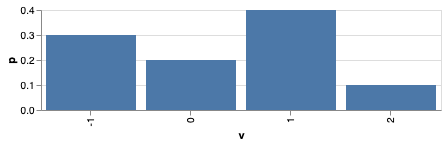

In [15]:
vs = [-1,0,1,2] # all the values v can take
ps = [P(V,[v]) for v in vs] # calculate the probability of each
import altair as alt # for plotting
import pandas as pd # to make dataframes

distribution = pd.DataFrame({'v':vs, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(x='v:O', y='p')

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 

`altair` is a useful python package for visualization. It's optimized to work with dataframes from the `pandas` package. Feel free to browse the documentation for these packages, but you don't need to be an expert to continue on in this book.
</div>

This is the graphical representation of the probability distribution

$$
P(\mathbf V=v) 
= 
\phi(v) 
= 
\begin{cases}
0.3 & \text{for }v=-1 \\
0.2 & \text{for }v=0 \\
0.4 & \text{for }v=1 \\
0.1 & \text{for }v=2
\end{cases}
$$

$\phi(v)$ is called a **probability mass function**. If we have multiple random variables floating around and we want to distinguish their mass functions, we'll sometimes write $\phi_{\mathbf V}(v)$.

If we want to know the probability of a particular set of events, say, $P(\mathbf V \in \{0,1\})$, it's easy to get using the density:

$$P(\mathbf V \in A) = \sum_{v \in A} \phi(v)$$

We simply sum up the probabilities that $\mathbf V$ is any of the events within the set $A$ of interest. The upshot is that we don't have to talk about $\Omega$ anymore. All of the information we need to calculate any probabilities of $\mathbf V$ is baked into the mass function $\phi(v)$.

### Continuous random variables and densities

So far, all the random variables we've talked about have produced outputs from a finite, discrete set (e.g. $\{0,1\}$ or $\{-1,0,1,2\}$). If we're imagining a the factory that might produce the data we observe when flipping a coin, a binary output is all we need. Similarly, if we want to imagine the factory that assigns an "apple", "orange", or "banana" label to a photograph of a fruit, it just needs to output a discrete set of three values. But if we want to imagine the kind of factory that could produce the prices of different apartments in New York, we need something that can output a continuous range of values.

Let's think up a random variable (call it $\bf Z$ again) that can take any value between 0 and 10. How many numbers are there between 0 and 10? Well, an infinite number: for any two numbers in that interval, you can find a number that's right between them. Since one nugget from the silo always prodcues the same event when pushed through the factory, there need to be an infinite number of nuggets in the silo to be able to produce an infinite number of events. That means our old code, where we manually enumerated all of the elements in $\Omega$, is not going to work anymore. What we can do instead is imagine that $\Omega$ is itself an interval, like all the numbers between 0 and 1. So, to pick a random nugget to throw into the factory, we just pick a random number between 0 and 1. Here's an example:

In [16]:
def Z(ω): 
    return 10*(ω**2) # when ω goes into the factory, the factory makes ω^2
Z.Ω = random.random # returns a single number between 0 and 1 when called

def realize_cont(rand_var): # run the assembly line!
    ω = Z.Ω() # returns a single number between 0 and 1
    return rand_var(ω) # push it through the factory

In [17]:
[realize_cont(Z) for i in range(5)]

[9.686438661914726,
 7.249601943411795,
 2.92820519514289,
 6.601299760715892,
 5.996821909933374]

So $\mathbf Z$ is defined by $\mathbf Z(\omega) = 10\omega^2$ with $\omega \in [0,1]$. Great. But now what does $P(\mathbf Z = z)$ mean? We just apply the same old definition of probability: it's the proportion of nuggets in the silo that are destined to become the value $z$. For the random variable $\bf z$ we've defined above, how many nuggets become the value $2.5$? $\mathbf Z$ transforms outcomes $\omega$ into realizations $z$ by applying the function $z=10\omega^2$, so the answer is just one: $\omega = \sqrt{2.5/10} = 0.5$. 

<div class="alert alert-block alert-warning">
<b>Note:</b> 

Notation like $[a,b]$ is often used to concisely write intervals- this just means "all the numbers between $a$ and $b$, including those endpoints". We use parentheses like $(a,b)$ to indicate that the endpoints should not be included. $(a,b]$ and $[a,b)$ have one of the two endpoints included, with the bracket indicating the endpoint that's included and the parenthesis indicating which isn't.
</div>

Thus to know $P(\mathbf Z = 0.75)$ what we need to know is how much "volume" a single point ($\omega = 0.5$) takes up within the interval $[0,1]$. The answer, which may not surprise you, is 0. If you want a rigorous argument for why that's the case, you have to pick up a real analysis or measure theory textbook. The implication is that for any (strictly) continuously-valued random variable, the probability of it taking any given value in particular is zero: $P(\mathbf Z = z) = 0$, no matter what $z$ is. 

Well that kind of sucks. It would be great if we had some kind of function that would just tell us what the probability of different subsets of events is, like we have in the discrete case with the probability mass function: $P(\mathbf V \in A) = \sum_{v \in A} \phi(v) = \sum_{v \in A} P(\mathbf V = v)$. It was easy to do that for discrete random variables, but if we try to do the same for continuous random variables, this is what we get: 

$$\sum_{z \in A} P(\mathbf Z = z) \sum_{z \in A} 0 = 0$$

We get 0 no matter what set $A$ we choose. Furthermore, this formula doesn't even make sense unless the set of events is discrete and we can sum over them. But what if we want to know the probability that $\mathbf Z$ is between 4 and 5? There is a continuous infinity of numbers between 4 and 5, so we can't sum over all of them discretely. And even if we could, $P(\mathbf Z = z)$ would be zero for all of them, so the answser would still be zero no matter what. We need a different tool.

Let's go back to our example and work forward from the definition of the sample space and $\mathbf Z$. What's the probability that the event $z$ is between two values $a$ and $b$? For instance, what's $P(\mathbf Z \in [2.5,9])$? Looking at the transformation $z = 10\omega^2$, you can see that only values of $\omega$ between $0.5$ and $0.3$ produce values between $2.5$ and $9$. The proportion of volume that the interval $[0.3, 0.5]$ takes up within the interval $[0,1]$ is is the length of the interval $[0.3, 0.5]$ (which is $0.2$) as a proportion of the length of the interval $[0,1]$ (which is 1). So $P(\mathbf Z \in [2.5,9]) = 0.2$!

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let $\mathbf Z$ be as it is above. Find a formula for $P(\mathbf Z \in [a,b])$ for any values $a \le b$ and $a,b \in [0,10]$.

</div>

Mission accomplished? Not quite. We managed to calculate a probability given the sample space and random variable, but what we want is some kind of function that we can manipulate to calculate these probabilities without reference to the sample space at all. We don't want to have to think about what $\Omega$ is or exactly how the different outcomes map to the different events.

So here's an idea: let's bin $z$ into 10 non-overlapping buckets, like $[0,1)$, $[1,2)$ ... $[9,10]$ and calculate the probability within each of those buckets. This is just like what we did in the discrete case. We're sorting all of the nuggets in the silo into different piles depending which set of values they are destined to become, and then measuring the volume of each pile. Here's what we get when we do that for the example random variable $\bf z$ defined in the code above:

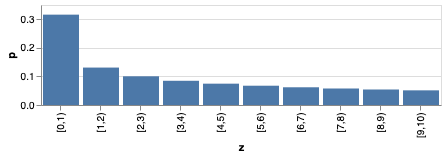

In [18]:
from math import sqrt

def Pz(a,b):
    return sqrt(b/10) - sqrt(a/10)

zs = range(10)
ps = [Pz(z,z+1) for z in zs]
zs_labels = [f'[{z},{z+1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(x='z:O', y='p')

And why stop at 10 buckets? Let's split it up into 100.

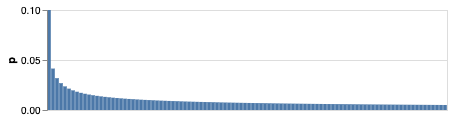

In [19]:
zs = np.arange(0,10,0.1)
ps = [Pz(z,z+0.1) for z in zs]
zs_labels = [f'[{z},{z+0.1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(alt.X('z:O',axis=None), y='p')

More buckets gives us more information. If we want to know $P(\mathbf Z \in [0,0.5))$, for instance, we can sum up the probabilities for the buckets $[0,0.1)$, $[0.1,0.2)$, ... $[0.4,0.5)$. But we can't get *any* probability. The graph doesn't have enough information to let us calculate probabilities over intervals whose ends are between two cutpoints of the buckets. It only has resolution up to increments of $0.1$ in terms of $z$. It would be nice to have a graph that lets us read off arbitrary probabilities like $P(\mathbf Z \in [a,b])$ just by looking at how much "stuff" there is between $a$ and $b$. Something like this:

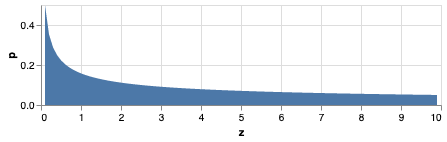

In [30]:
z = np.arange(0.1,10,0.1)
p = 1/(2*np.sqrt(10*z)) # magic, for now...

distribution = pd.DataFrame({'z':z, 'p':p})
alt.Chart(distribution, height=100, width=400).mark_area().encode(x='z', y='p')

Before I explain how I managed to make this graph, which is called a **density plot**, I want to establish an intuition for what it means. We've gone from 10 buckets, to 100 buckets, to "infinite" buckets. I like to think of these pictures literally: all the outcomes $\omega$ neatly piled up on top of the labels $z$ for the values they will become. So to get $P(\mathbf Z \in [a,b])$ from this picture, which is just the volume of outcomes that map to values between $a$ and $b$, all we need to do is see how much stuff there is piled up between $a$ and $b$ in the picture. 

To do this, we turn to a useful tool from calculus: the integral. To make the picture above, we need a curve $\phi(z)$ such that the area under $f$ between $a$ and $b$ is $P(\mathbf Z \in [a,b])$ for all values $a$ and $b$. In the previous exercise you should have figured out that $P(\mathbf Z \in [a,b]) = \sqrt{\frac{b}{10}} - \sqrt{\frac{a}{10}}$. So what we need is the curve $\phi(z)$ that satisfies this equation:

$$\int_a^b \phi(z) dz = P(\mathbf Z \in [a,b]) = \sqrt{\frac{b}{10}} - \sqrt{\frac{a}{10}}$$

Looking at the integral equation, it's clear that $\Phi(z) = \sqrt{\frac{z}{10}}$ is the antiderivative of $\phi(z)$, so all we need to do to get $\phi$ is differentiate $\Phi$:

$$\phi(z) = \frac{d\Phi(z)}{dz} = \frac{d}{dz} \sqrt{\frac{z}{10}} = \frac{1}{2\sqrt{10z}}$$

<div class="alert alert-block alert-warning">
<b>Note:</b> 

If this doesn't make any sense to you, you should stop and go review a friendly calculus book or any of the great online resources on the topic.
</div>

Now the line `ps = [1/(2*sqrt(10*z)) for z in zs]` in the code above should make sense to you.

The function $\phi(z)$ is called a **probability density function** (PDF), which is the continuous equivalent of the probability mass function. Its integral $\Phi(z) = \int_{-\infty}^z \phi(t)dt = P(\mathbf Z \le z)$ is called a **cumulative density function** (CDF). Either of these functions tell you everything you need to know about probabilities of the random variable $\mathbf Z$. The probability that $\mathbf Z$ takes any of the values in an arbitrary set $A$ is 

$$P(\mathbf Z \in A) = \int_{A} \phi(z) dz$$

This works the same way as the probability mass function for a discrete random variable $\mathbf V$:

$$P(\mathbf V \in A) = \sum_{v \in A} \phi(v)$$

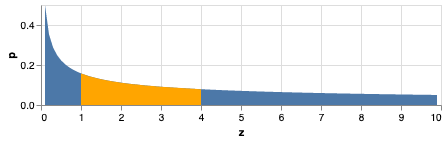

In [49]:
A = (1<=z) & (z<=4)
distribution = pd.DataFrame({'z':z, 'p':p, 'A':A})
alt.Chart(distribution, height=100, width=400).mark_area().encode(
    x='z',
    y='p'
) + alt.Chart(distribution.query('A')).mark_area(color='orange').encode(
    x='z',
    y='p'
)

For example, the probability that $\mathbf Z$ is in the set $[1,4]$ is the area shaded in orange above.

<div class="alert alert-block alert-warning">
<b>Note:</b> 

The notation $\int_{A} \phi(z) dz$ just means $\int_{-\infty}^\infty I_A(z)\phi(z) dz$ where the <b>indicator function</b> $I_A(z)$ is 1 if $z\in A$ and 0 else. In othe words, all we're doing is summing up the $\phi(x)dx$s where $x \in A$. That's analogous to summing up the $\phi(v)$s where $v \in A$ in the discrete case.

</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

For our random variable $\mathbf Z$ with density $\phi(z) =\frac{1}{2\sqrt{10z}}$, what is $P(\mathbf Z \in [0, 10])$? Calculate the probability by integrating the density function. Does your answer line up with what you expect based on our original definition of $\mathbf Z$? 
    
Here is another random variable that, like $\mathbf Z$, maps outcomes in $\Omega = [0,1]$ to values in $[0,10]$: $\mathbf W(\omega) = 10\omega$. Calculate $P(\mathbf W \in [a,b])$ for some interval $[a,b]$. What is the probability density function for $\mathbf W$? What is $P(\mathbf W \in [0, 10])$?
    
For <i>any</i> continuous random variable $\mathbf X$, what is $\int_{-\infty}^{\infty} \phi(x) dx$ (<i>hint</i>: what probability does this represent)? What is $\Phi(-\infty)$? $\Phi(\infty)$? 
    
Is it possible to have a random variable $\mathbf Q$ with $\phi_{\mathbf Q}(q) < 0$ for some $q$ that is a possible event of $\mathbf Q$? Why does this not make sense?
    
For two values $a < b$, is it possible that $\Phi(a) > \Phi(b)$? Why nor why not?
    
</div>

At this point, talking about the outcomes $\omega$ is kind of silly. If two random variables have the same probability mass function or the same probability density function, then, for all intents and purposes, they are the same random variable. It doens't matter exactly which outcomes map to which values, as long as the proportions are the same. We already demonstrated this in the discrete case.

To show the same concept for continuous random variables, here is a new random variable $\mathbf Z'$ whose sample space $\Omega$ is $[-100, 100]$ instead of $[0,1]$, but which has the same probability density function as our other random variable $\mathbf Z$: 

$$
\mathbf Z'(\omega) = 10\left(\frac{\omega+100}{200}\right)^2
$$

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Prove to yourself that $\mathbf Z'$ has the same probability density function as $\mathbf Z$.
    
</div>

For this we use the notation $\mathbf Z \sim \mathbf Z'$. Technically they are not the same, since the sample spaces are different, but as far as an observer who is outside the curtain is concerned, there is no way to tell them apart. The *distribution* of the random variable is what really matters. 

### Histograms vs. mass and density functions

Many of you are probably already familiar with histograms. Histograms are a way of visualizing observed data. Each observed value is stacked up on top of its approximate label (e.g. any $z$ between 0.5 and 1.5 is labeled "1") and the counts are plotted:

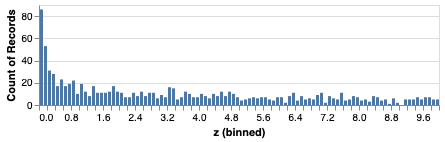

In [22]:
z = [realize_cont(Z) for i in range(1000)] # 1000 draws from Z

plot_df = pd.DataFrame({'z':z})
alt.Chart(plot_df, height=100, width=400).mark_bar().encode(
    alt.X('z', bin=alt.Bin(maxbins=100)),
    y='count()'
)

That looks suspicously like our bucketed density plot:

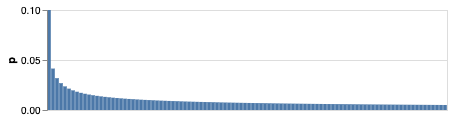

In [23]:
zs = np.arange(0,10,0.1)
ps = [Pz(z,z+0.1) for z in zs]
zs_labels = [f'[{z},{z+0.1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(alt.X('z:O',axis=None), y='p')

So what's the difference? Think about what it is we're "stacking up" in the bars. In the histogram, we're sorting and stacking up a *finite number* $n$ of *observed values* $z_i$ according to what they are. In the density plot, we're sorting and stacking up *all* of the *outcomes* $\omega$ in the silo according to the values they are destined to become, and we're measuring their relative volume, not absolute counts.

In a nutshell, the histogram is what we can actually observe, given outputs from the factory. But the density descibes the inner workings of the factory itself, which we can never actually observe.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

What do you expect to happen to the histogram above as the number of observations is increased from $1000$ to larger and larger numbers? Can you provide an intuitive explanation for why this happens?
    
</div>

### Common Distributions

We've seen that, for all practical purposes, a random variable is determined by its probability distribution (mass or density function). In reality, the distribution of any particular measurement (e.g. blood pressure) is unknown- it depends on a complex web of causal factors. The true density function is almost certainly so complex it's not even something that we could write down. But, for the purposes of *modeling* that measurement, we can pretend that the density is something we *can* write down. 

Over the centuries, people have come up with a lot of distributions that are useful as models across various scenarios. Here are a few of them:

#### Bernoulli distribution

Let's say we're interested in modeling the result of a coin flip. The actual value (heads/tails, which we code as 0/1) of the coin flip is determined by some insanely complicated physics, but we're going to pretend that the value comes out of a little factory called $\mathbf Z$ that has the following probability mass function:


$$
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

If we want to model a biased coin that comes up heads $(p\times100)$% of the time, we can use a mass function like:

$$
P(\mathbf Z=z) =
\begin{cases}
p & \text{for }z=0 \\
1-p & \text{for }z=1
\end{cases}
$$

This is often written as $\mathbf Z \sim \text{Bernoulli}(p)$ (read: "$\mathbf Z$ is Bernoulli-distributed"). The number $p$ is said to be a *parameter* of the Bernoulli distribution. It would be more accurate to say that a random variable is distributed as a *member* of the Bernoulli *family* of distributions, since, technically, every different value of $p$ encodes a different distribution, or factory, for making data.

Another way to think about it is that there's one data factory, but it has a control panel with a knob labeled "$p$". If $p$ is set to 0.7, we expect about 70% of the outputs to be 1. If $p$ is set to $0.1$, 10%, and so on. It's a matter of semantics whether or not you want to say that factory is representing two different factories, or merely one factory under two different operating conditions. Both perspectives are useful.

#### Normal Distribution

Let's say we want to model the heights of everyone on Earth. We have an intuition that people are typically a bit shorter than two meters, and taller and shorter people are more and more rare the taller and shorter they get. We can pretend that height measurements come from a *normal* distribution (also called *Gaussian* distribution):

$$
\phi(z) = 
\frac{1}{\sqrt{2\pi\sigma}} 
e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Most often you'll see this written as $\mathbf Z \sim \mathcal N(\mu, \sigma)$ (read: "$\mathbf Z$ is normally distributed"). The numbers $\mu$ and $\sigma$ are the parameters (control knobs) of the normal distribution. 

![](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

As you can see in the picture, $\mu$ controls where the "bell curve" is centered and $\sigma$ controls how wide or narrow it is.

#### Others 

There are [hundreds](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg) of well-studied distributions available to choose from when modeling. The most important thing to know about a distribution is what values random variables that are so-distributed can produce. This is sometimes called the *support* of the distribution. For instance, varaibles that are normally-, Cauchy-, or Laplace-distributed can take values between $-\infty$ and $\infty$. The $\chi^2$ distribution has support on $[0,\infty)$. The beta and standard uniform distributions have support on $[0,1]$. The Poisson distribution has support on the counting numbers 0, 1, 2..., and the K-categorical distribution has support on a finite number of integers 0, 1, 2, ... K. 

It's also totally possible to invent your own distribution by defining your own support set $A$ and mass/density function $\phi$, as long as $\phi(a) \ge 0$ for all $a \in A$ and $\int_A \phi(a) da = 1$ (see exercise in previous section).

The point of this diversity is that it is possible to model different kinds of data. Apartment rents are always positive numbers, but theoretically unbounded above (a scary thought), so perhaps $\chi^2$ is a good choice. The number of cars that pass through an intersection in a given day is always an integer, so Poisson is a reasonable choice for that. You don't have to remember any of these specific distributions or examples- just know there are many preconstructed pretend data factories out there to play with. Also know that the real data-generating process is pretty much *never* actually one of these distributions, although, sometimes, it might be well-approximated by one.

## Multivariate random variables

Until now, we've only discussed scalar-valued random variables, which produce a single value at a time. In supervised learning, we need to figure something out about the relationship between a vector of predictors $x_i$ and a label $y_i$, which we imagine are generated in pairs by some data factory. We need language to describe that kind of factory.

A multivariate (or vector-valued) random variable is a factory that produces vectors instead of scalars. More formally, it's a mapping between outcomes in the sample space to vectors of numbers. All our old rules still apply: one outcome strictly maps to one vector. We can demonstrate:

In [24]:
def Z(ω): 
    if ω in set([1,8]):
        return (0,0)
    if ω in set([4,5,9]): 
        return (1,0)
    if ω in set([0,2,3]):
        return (0,1)
    if ω in set([6,7]):
        return (1,1)
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) 

In [25]:
[realize(Z) for i in range(5)]

[(0, 1), (1, 0), (1, 0), (1, 0), (0, 0)]

This is a discrete multivariate random variable because it can only return four possible values: $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$. It's also possible to make continuous multivariate random variables:

In [26]:
def Z(ω): 
    z1 = ω**2
    z2 = 1-ω
    return (z1, z2)
Z.Ω = random.random # returns a single number between 0 and 1 when called

In [27]:
[realize_cont(Z) for i in range(5)]

[(0.0946863421676289, 0.6922885407274716),
 (0.008179568731974963, 0.9095590317832954),
 (0.7032324847497207, 0.16141041936491918),
 (0.3328748946232098, 0.4230468869802245),
 (0.0438847722539876, 0.7905130737874375)]

Probabilities are the same for multivariate random variables as they are for univariate random variables: you grab all of the outcomes in the sample space that are destined to become one of the values you're looking for and you measure their relative volume. The calculations do get a little trickier, but the intuition is the same. When we were working with univariate random variables, the sets of interest were usually intervals (i.e. what's the probability that $z$ is between $a$ and $b$?). In the multivariate case, the equivalent of an interval on the number line is a region of the vector space. In general, you can think of a picture like this:

![](2d_rv_preimage.png)

For example, with $\mathbf Z(\omega) = (\omega^2, 1-\omega)$ as it is in our code, let's find the probability that the output vector $z = (z_1,z_2)$ is in the region corresponding to $z_1<0.5$ and $z_2<0.5$. Let's call that region $A = \{(z_1,z_2):z_1<0.5, z_2<0.5)\}$.

In mathematical notation, what we're looking for is $P(\mathbf Z \in A)$ The first thing to notice is $z_1$ will only be less than $0.5$ if $\omega$ is less than $\sqrt{0.5}$, while $z_2$ will only be less than $0.5$ if $\omega$ is greater than $0.5$. Stop and verify both of these facts. We need both conditions to hold, so the set of $\omega$s that place $z$ into the region of interest is $[0.5, \sqrt{0.5}] \approx [0.5, 0.707]$. The volume of that set relative to the total sample space $[0,1]$ is $0.707-0.5$, so $P(\mathbf Z \in A) = 0.207$.

The outcomes and sample space are important to the definition of probability for multivariate random variables, but as we discussed in the previous section, we never really talk about the outcomes $\omega$. Usually we define a random variable by directly specifying a probability distribution. That implies there is some sample space that is being mapped to the different realizable values in proportions corresponding to the mass or density function, but we don't actually care what it is. Calculating the probabilities of different events is just a matter of integrating the density over the appropriate set of events.

A multidimensional mass or density function works the same way as a unidimensional mass or density. For some set of events $A$,

$$P(\mathbf Z \in A) = \int_A \phi(z) dz$$

or, if $\mathbf Z$ is discrete,

$$P(\mathbf Z \in A) = \sum_{z \in A} \phi(z)$$

In other words, add up the total volume of the outcomes that end up mapping to an event in $A$- same as before. Let's say we have a 2-dimensional random variable $\mathbf Z$ with the following distribution:

$$ 
\phi(z)
= 
\phi([z_1, z_2])
= 
\begin{cases}
1 & \text{for  } z_1, z_2 \in [0,1] \\
0 & \text{else}
\end{cases}
$$

This is the 2-dimensional **uniform** distribution over $[0,1] \times [0,1]$, which is often written $\mathbf Z \sim \text{Unif}([0,1]\times[0,1])$.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
$[0,1] \times [0,1]$ is shorthand for the square set $\{(z_1,z_2) : z_1 \in [0,1], z_2 \in [0,1]\}$.
    
</div>

Let's find the probability that $\mathbf Z$ takes values in the "triangle" $A$ defined by the vertices $[0,0]$, $[1,1]$, and $[1,0]$. Another way to define this is $A = \{(z_1,z_2) : z_1 \in [0,1], 0 \le z_2 \le z_1\}$. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Copy this coordinate system onto a piece of paper:
    
<img src='axes.png'>
    
Draw in tick marks for $z_1$ = 1 and $z_2$ = 1. On the $(z_1,z_2)$ plane, lightly shade in the region for which $\phi(z)$ is 1. Shade in the region $A$ (as defined above) more darkly. 
    
On the vertical axis, use the lightly shaded region to draw in the surface of $\phi(z)$.
    
Using geometry, calculate the volume under $\phi(z)$ that's on top of the darkly shaded region $A$. This is $P(\mathbf Z \in A)$.
    
</div>

We can use calculus to get the same answer:

$$
\begin{array}{rcl}
P(\mathbf Z \in A) & = & \int_A \phi(z) dz \\
& = & \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} I_{A}(z) \phi(z) dz_1 dz_2 \\
& = & \int_0^1 \int_0^{z_2} 1 dz_1 dz_2 \\
& = & 1/2
\end{array}
$$

Note that, just as with unidimensional random variables, the density of any multidimensional random variable has to integrate to 1 over its entire support: $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \phi(z) dz_1 dz_2 = 1$. As before, this is so that the answer to "what is the probability that $z$ is any point in the $(z_1, z_2)$ space at all?" is the intuitive "1". It's also the same as saying that the silo of outcomes has total volume equal to 1.

### Joint Distributions

We often think about multivariate random variables as several different random variables "glued together" into one: 

$$\mathbf Z = [\mathbf Z_1, \mathbf Z_2]$$

Now, instead of talking about the distribution of $\mathbf Z$, we talk about the **joint distribution** of $\mathbf Z_1$ and $\mathbf Z_2$. It's the exact same thing, though. The only advantage of doing this is that we don't have to give the joint variable $\mathbf Z$ a name if we don't care to.

$$ 
\phi_\mathbf{Z}(z)
=
\phi_\mathbf{Z}([z_1, z_2])
=
\phi_{\mathbf Z_1, \mathbf Z_2}(z_1, z_2)
$$

![](2d_joint.png)

What's being glued together are two factories- they still share one silo. Our metaphor gets a little tricky here because the same single nugget of ore $\omega$ now passes simultaneously through both factories to produce the two outputs $z_1$ and $z_2$. As with all metaphors, it can only carry us so far! 

Let's look at an example of a joint distribution of two discrete random variables $\mathbf V_1$ and $\mathbf V_2$ that I made up, each of which take values from $\{0,1,2,\dots 9\}$. 

In [420]:
def joint(v1, v2): # v1, v2 in {0,1,2,..9}
    P_raw = np.array(
      [[ 0.,  0.,  1.,  9., 30., 32., 19.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 12., 28., 30., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 20., 35., 27.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  8., 21., 38., 39., 11.,  2.],
       [ 0.,  0.,  0.,  0.,  4., 32., 37., 15.,  4.,  1.],
       [ 0.,  0.,  1.,  5., 18., 43., 21.,  8.,  2.,  0.],
       [ 0.,  0.,  6., 25., 35., 25.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 19., 47., 20., 16.,  1.,  0.,  0.,  0.],
       [ 2., 12., 32., 36., 17.,  3.,  0.,  0.,  0.,  0.],
       [ 9., 15., 44., 32.,  7.,  0.,  0.,  0.,  0.,  0.]])
    return P_raw[v1, v2]/np.sum(P_raw) # need to make it so that Σ p_ij = 1 so that this is a valid mass function

We can calculate probabilities using the mass function as usual: $P(\mathbf V_1 =1, \mathbf V_2 = 5) = \phi(1,5)$:

In [421]:
joint(1,5)

0.028

Let's plot the joint mass function as a heatmap so we can get a better feel for it.

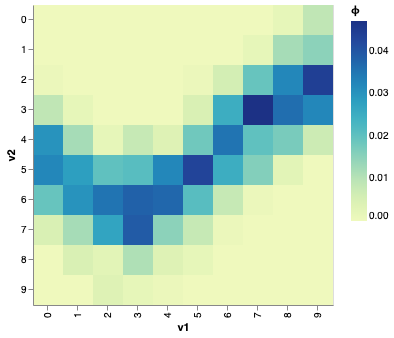

In [422]:
from itertools import product
vs = list(product(range(10), range(10))) # all the possible combinations of (v1, v2)
prob = [joint(v[0],v[1]) for v in vs]
v1, v2 = zip(*vs)
plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'ϕ':prob})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='ϕ')

We can also calculate the probability of events that are encoded as "regions" in the event space, as we did with our continuous random variable. For example, let's say we're interested in the probability that $\mathbf V_1$ takes a value that is at least 2 units less than $\mathbf V_2$. We can write that as $P(\mathbf V_1 \le \mathbf V_2 - 2)$ or as $P([\mathbf V_1, \mathbf V_2] \in A)$ where $A$ is the region that looks like this:

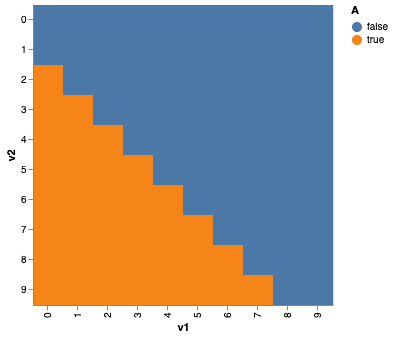

In [423]:
a = np.array(v1) <= np.array(v2)-2
plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'A':a})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='A:N')

To get the probabiity we want, we just need to sum up all the values of the joint mass function that are over the orange region of interest

$$P(\mathbf V_1 \le \mathbf V_2 - 2) = \sum_{v_1 \le v_2-2} \phi(v_1, v_2)$$

In [441]:
sum(joint(v1,v2) for v1, v2 in vs if v1<=v2-2)

0.454

### Conditional Probabilities

Thinking about combinations of random variables buys us the ability to talk about the relationships between measurements of the different variables. For instance, if we beleive that $[Z_1, Z_2]$ is the factory that generates measurements of people's heights ($z_1$) and weights ($z_2$), can we calculate the probability that someone who is over 2 meters tall weighs more than 80 kilograms? 

Probabilities like these are called **conditional probabilities**. That's because we're interested in the probability of something, given that some other condition holds. In our example, the condition is that the person must be over 2 meters tall. The notation for this is $P(\mathbf Z_2 > 80 | \mathbf Z_1 > 2)$, which is read as "the probability of $\mathbf Z_2 > 80$ given $\mathbf Z_1 > 2$".

How do we calculate that probability, given a joint density or mass? Let's think about it... any probability is just a volume of some subset of the outcomes in the sample space. So what we're really asking for is the volume of the outcomes $\omega$ that map to values of $z_1$ greater than 2 and also $z_2$ greater than 80, relative to the volume of the outcomes that map to values of $z_1$ greater than 2. 

![](conditional_rv.png)

In the picture above, the conditonal probability we're looking for is the ratio of the volumes of the purple oval and the grey circle, which are subsets of the sample space.

We can get the volume of outcomes mapping to a particular region of the event space (like $z_1>2$) by integrating the density over that region. Thus what we need to do is first integrate the density over the region where heights are more than 2 meters, then do the same for the region where heights are more than 2 meters *and* weights are over 80kg. Then we should divide the latter by the former to get the proportional volume of the two sets of outcomes: 

$$
P(\mathbf Z_2 > 80 | \mathbf Z_1 > 2)
= 
\frac
{P(\mathbf Z_2 > 80, \mathbf Z_1 > 2)}
{P(\mathbf Z_1 > 2)}
= 
\frac
{\int_{z_2 > 80, z_1 > 2} \phi(z_1, z_2) dz_1 dz_2}
{\int_{z_1 > 2} \phi(z_1, z_2) dz_1 dz_2}
=
\frac
{\int_{80}^{\infty} \int_{2}^{\infty} \phi(z_1, z_2) dz_1 dz_2}
{\int_{-\infty}^{\infty} \int_{2}^{\infty} \phi(z_1, z_2) dz_1 dz_2}
$$

It works the same way for discrete random variables:

$$
P(\mathbf V_1 \in A_1 | \mathbf V_2 \in A_2) 
= 
\frac
{P(\mathbf V_1 \in A_1, \mathbf V_2 \in A_2)}
{P(\mathbf V_2 \in A_2)}
= 
\frac
{\sum_{v_1 \in A_1, v_2 \in A_2} \phi(v_1, v_2)}
{\sum_{v_2 \in A_2} \phi(v_1, v_2)}
$$

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Go back to the code we had in the section above that defined a joint density function for two discrete random variables $\mathbf V_1$ and $\mathbf V_2$. Use that density function to calculate $P(V_1 < 4| V_2 > 3)$. The answer you should get is about 0.546.
    
</div>

We can take this idea step further and define the **conditioned random variable** $\mathbf Z_1 | (\mathbf Z_2=z_2)$. This is random variable that you get when you take $\mathbf Z_1$, but subset the sample space $\Omega$ to include only those outcomes where $\mathbf Z_2(\omega) = z_2$. Each different value of $z_2$ defines a different conditioned version of $\mathbf Z_1 | \mathbf Z_2$.

We're getting *really* close to machine learning now. Remember $x_i$ and $y_i$? Let's say we observe $x_i$ but we don't know what $y_i$ is. If those are realizations from some random variables $\mathbf X_i$ and $\mathbf Y_i$, though, and we know their joint density, then we can calculate $P(\mathbf Y_i | \mathbf X_i = x_i)$. That tells us the probability that $Y_i$ is any value we want to know, given that we know what $x_i$ was! We can then find the value or region of $y$ that has the most probability- this would be the most likely label, our best guess for what the unobserved $y_i$ is! Of course, we can't actually know what the real joint density is (we don't see the real factory). But we'll get to that.

The distribution of the random variable $\mathbf Z_1|(\mathbf Z=z_2)$ is easy to extract from the joint distribution: just hardcode the $z_2$ value in the joint distribution to the desired value: $\tilde\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) = \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$. The only wrinkle is that the resulting $\tilde\phi$ will not be normalized so that its total probability across all $z_1$ is 1 (i.e. the new "silo" will not have volume 1). To fix this, we scale the whole function up by dividing by the total area under $\tilde\phi$:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1}
$$

or, for discrete random variables:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\sum_{z_1} \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
$$

When I think of conditional density, though, I don't think of a formula. I think of a picture like this:

![](bivariate_norm_cond.png)

Here you can see two things: 

1. After conditioning on $\mathbf Z_2$, the density is now only a function of $z_1$. The old factory $[\mathbf Z_1, \mathbf Z_2]$ produces two values at a time ($z_1$ and $z_2$). The conditioned factory $\mathbf Z_1 | \mathbf Z_2=z_2$ just produces one: $z_1$. Another way to think about this is that we've taken the original factory and reduced it to the operating conditions under which $z_2$ comes out as a particular value.
2. The conditioned density you get back depends on the value $z_2$ that you condition on. As you scan $z_2$ across its range, the shape of the resulting conditioned distribution will change.

When there more than two dimensions, it's harder to picture this, but the idea is the same. You "slice" the multivariate distribution at the specified place on the specified axis. The conditional distribution can itself also be multivariate: if you have four variables and you slice at a place given by two of them, you'll get back a distribution over the remaining two. 

### Marginal Probabilities

The "scaling factor" $\int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1$ or $\sum_{z_1} \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$ that we need to calculate the conditional distribution only depends on what the value of $z_2$ is. You can think of it as summing up all the variation over $z_1$ at a given level of $z_2$. This quantity is called the **marginal distribution** of $\mathbf Z_2$ and is usually denoted $\phi_{\mathbf Z_2}(z_2)$. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

I just boldly claimed that $\phi_{\mathbf Z_2}(z_2) = \int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1$ is a density function. But we know density functions have to a) integrate to 1 and b) be nonnegative. Show that this is the case for $\phi_{\mathbf Z_2}(z_2)$ as long as $\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$ is a valid density (also integates to 1 and is nonnegative). 
    
What about for discrete random variables? What are the equivalent conditions that need to be proved? Can you prove them?
    
</div>

The marginal distribution of $\mathbf Z_2$ is what you get when you consider the factory $[\mathbf Z_1, \mathbf Z_2]$, but completely ignore the outputs $z_1$ and only look at the $z_2$s. You haven't changed the silo $\Omega$ at all (unlike conditioning). Thinking about it in terms of density plots, the 2D *joint* density plot is what you get when you stack up all of the outcomes on top of the labels of the points $(z_1, z_2)$ that they map to. The *marginal* density plot is what you get when you combine all of the stacks of outcomes that have the same $z_2$ label. 

The marginal distribution allows for the calculation of things like $P(\mathbf Z_2 \in A)$ when a joint distribution is given. For example, what if we wanted to know the outright probability that someone is between 1.9 and 2.3 meters tall, regardless of their weight? If we start out with the joint distribution of height and weight, first we have to find the marginal distribution of height (by integrating out the weight variable), then integrate the resulting distribution between 1.9 and 2.3 to get the final answer.

The marginal distribution also allows for a simplified formula to compute conditional distributions, which works for both discrete and continuous random variables:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\phi_{\mathbf Z_2}(z_2)}
$$

In higher dimensions, it's possible to "marginalize out" one or several variables at once, which leaves you with a distribution over the remaining variables. For example, if we had a joint distribution of 5 variables given by $\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)$, we could marginalize out $\mathbf Z_2$ and $\mathbf Z_5$ to get 

$$
\phi_{\mathbf Z_1, \mathbf Z_3, \mathbf Z_4}(z_1, z_3, z_4)
=
\int_{-\infty}^\infty \int_{-\infty}^\infty 
\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)
dz_2 dz_5
$$

We need to do this to condition on multiple variables at once:

$$
\phi_{\mathbf Z_2, \mathbf Z_5|\mathbf Z_1=z_1, \mathbf Z_3=z_3, \mathbf Z_4=z_4}(z_2, z_5) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)}
{\phi_{\mathbf Z_1, \mathbf Z_3, \mathbf Z_4}(z_1, z_3, z_4)}
$$

The equations look gross because we're keeping track of all of the individual random variables, but the notation simplifies if use vector-valued (multivariate) random variables to give the different groups of variables their own names:

$$
\mathbf X = [\mathbf Z_1, \mathbf Z_3, \mathbf Z_4]
\quad
\mathbf Y = [\mathbf Z_2, \mathbf Z_5]
$$

$$
\phi_{\mathbf Y|\mathbf X=x}(y) 
=
\frac
{\phi_{\mathbf X, \mathbf Y}(x,y)}
{\phi_{\mathbf X}(x)}
$$

This notation is very common. Just remember that now we are talking about conditioning or marginalizing on a vector-valued random variable instead of a scalar-valued random variable. You can always write it out in the longform notation if you get confused.

### Conditional and Marginal Probabilities in Code

To solidify these ideas, we'll go back to our pair of random variables $\mathbf V_1$ and $\mathbf V_2$ with the joint density specified by our function `joint()`.

We'll start with the marginal distributions since we need those to calculate the conditional distributions. The marginal distributions $\phi_{\mathbf V1}$ and $\phi_{\mathbf V2}$ are:

In [378]:
def marginal_V1(v1):
    return sum(joint(v1, v2) for v2 in range(10))
    
def marginal_V2(v2):
    return sum(joint(v1, v2) for v1 in range(10))

Now we can calculate marginal probabilities like $P(\mathbf V_2 = 5)$:

In [450]:
marginal_V2(5)

0.21999999999999997

Now let's calculate all of the marginal probabilities for each variable and make mass plots out of them:

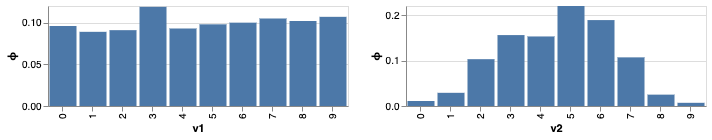

In [397]:
v1, v2 = range(10), range(10)
marg_v1 = [marginal_V1(v) for v in v1]
marg_v2 = [marginal_V2(v) for v in v2]

v1_plot_data = pd.DataFrame({'v1':v1, 'ϕ':marg_v1})
v2_plot_data = pd.DataFrame({'v2':v2, 'ϕ':marg_v2})

v1_plot = alt.Chart(v1_plot_data, height=100, width=300).mark_bar().encode(x='v1:O', y='ϕ')
v2_plot = alt.Chart(v2_plot_data, height=100, width=300).mark_bar().encode(x='v2:O', y='ϕ')

v1_plot | v2_plot

These are fine as-is, but it helps to understand what they mean when you arrange them alongside the joint distribtion like this:

![](marginal_joint.png)

Compare the figure to the formula we were looking at before: $\phi_{V_2}(v_2) =  \sum_{v_1} \phi_{\mathbf V_1, \mathbf V_2}(v_1,v_2)$ or the code `sum(joint(v1, v2) for v1 in range(10))`. I think the picture is much more intuitive, but, over time, you will be able to imagine the picture when you see the symbols. 

To transfer your intuition from the discrete case to the continuous case, do what we did before: imagine the buckets shrinking down smaller and smaller to infinitesimals until the sums become integrals and the mass functions become densities.

With functions to compute marginal and joint probabilities in hand, we can turn our attention to computing any conditional density we like. Let's do $\phi_{\mathbf V_2 | \mathbf V_1 = 7}$ and $\phi_{\mathbf V_1 | \mathbf V_2 = 4}$:

In [392]:
def cond_V2_given_V1_is_7(v2):
    return joint(7,v2)/marginal_V1(7)

def cond_V1_given_V2_is_4(v1):
    return joint(v1,4)/marginal_V2(4)

So $P(\mathbf V_2 = 3 | \mathbf V_1 = 7)$ is... 

In [393]:
cond_V2_given_V1_is_7(3)

0.4476190476190476

And here are the mass plots

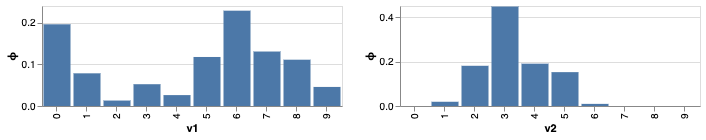

In [400]:
cond_v1 = [cond_V1_given_V2_is_4(v) for v in v1]
cond_v2 = [cond_V2_given_V1_is_7(v) for v in v2]

v1_plot_data = pd.DataFrame({'v1':v1, 'ϕ':cond_v1})
v2_plot_data = pd.DataFrame({'v2':v2, 'ϕ':cond_v2})

v1_plot = alt.Chart(v1_plot_data, height=100, width=300).mark_bar().encode(x='v1:O', y='ϕ')
v2_plot = alt.Chart(v2_plot_data, height=100, width=300).mark_bar().encode(x='v2:O', y='ϕ')

v1_plot | v2_plot

Again, fine on their own, but more intuitive when you see them in the context of the joint distribution:

![](conditional_joint.png)

As before, compare this to $\phi_{\mathbf V_2|\mathbf V_1=v_1}(v_2)=\frac{\phi_{\mathbf V_1, \mathbf V_2}(v_1,v_2)}{\phi_{\mathbf V_2}(v_2)}$ or to `joint(7,v2)/marginal_V1(7)`. In this case, I think the math is actually pretty clear once you realize that the denominator is a constant scaling factor that only serves to make sure that the probabilities sum to 1.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let's pretend that fruits are generated by some probability distribution that specifies their *color* $\mathbf C$, which can be red, yellow, or green, and their *type* $\mathbf T$, which can be apple, pear, or banana. Basically, we're imagining that a "fruit" is actually a pair of variables $c,t$ which come out of the factory $(\mathbf C, \mathbf T)$, which has some joint mass function $\phi_{\mathbf C, \mathbf T}(c,t)$. 
    
Until this point, we've been extracting conditional and marginal distributions from the joint, but now we will see how conditional and marginal distributions can also be used to reconstruct a joint distribution.

Let's pretend that we know the following: 
- 50% of apples are red, 0% are yellow, 50% are green
- 20% of pears are red, 40% are yellow, 40% are green
- 0% of bananas are red, 90% are yellow, 10% are green
    
Write out each of these nine facts as conditional probabilities. For instance "50% of apples are red" is $P(\mathbf C = \text{red} | \mathbf T = \text{apple}) = 0.5$. These are also statements about the probability mass function: $\phi_{C|T=\text{apple}}(\text{red}) = 0.5$
    
Now let's pretend that 50% of all fruits are apples, 20% are pears, and 30% are bananas. Write the probability mass function for the marginal distribution of $\mathbf T$.

Now we're ready to answer some questions. What is the probability that a fruit is a red apple? In other words, what is $P(\mathbf C = \text{red}, \mathbf T = \text{apple}) = \phi_{\mathbf C, \mathbf T}(\text{red}, \text{apple})$? Recall that for two variables $\mathbf Z_1$ and $\mathbf Z_2$, we have $
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\phi_{\mathbf Z_2}(z_2)}
$.
    
Now you can any probability under the joint distribution that you like, which means you can calculate <i>any</i> marginals or conditonals. Give it a try: calculate the probability that a fruit is red: $P(\mathbf{C}=\text{red})$.
    
</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Consider three continuous random variables $\mathbf X$, $\mathbf Y$, and $\mathbf Z$. I've written python functions that implement $\phi_{\mathbf Z | \mathbf X = x, \mathbf Y = y}(z)$ and $\phi_{\mathbf X = x, \mathbf Y = y}(x,y)$. 
    
```
from scipy.stats import norm, multivariate_normal

# call this like: conditional_z_xy(0,(2,1)) to get ϕ(Z=0|X=2,Y=1)
def conditional_z_xy(z, condition): 
    x, y = condition
    return norm(x+y,1).pdf(z)

def marginal_xy(x,y):
    return multivariate_normal([0,0], [[1,0.5],[0.5,3]]).pdf((x,y))
```

Use these two to write a python function `joint_xyz` that implements $\phi_{\mathbf X, \mathbf Y, \mathbf Z}(x,y,z)$. What is $\phi_{\mathbf X, \mathbf Y, \mathbf Z}(1,1,2)$? The answer I get is about 0.22.
    
</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Here is a density function of three variables that I made up: 
    
$$\phi(z_1, z_2, z_3) 
=
\begin{cases}
8 z_1 z_2 z_3 & \text{if } z_1,z_2,z_3 \in [0,1] \\
0 & \text{else}
\end{cases}
$$
    
I <a href='https://www.wolframalpha.com/input/?i=int+from+0+to+1%28int+from+0+to+1%28int+from+0+to+1+of+%288*x*y*z%29+dx%29dz%29dy'>verified using WorlframAlpha</a> that the total probability is 1, and obviously it's not negative anywyere, so this is a valid density function.
 
Calculate $P(\mathbf Z_1 = 0.3)$. Also calculate $P(\mathbf Z_1 = 0.3| \mathbf Z_2 = z_2, \mathbf Z_3=z_3)$ for any values $z_2$ and $z_3$ of your choosing. Again, feel free to use WolframAlpha to evaluate the integrals if you don't feel like doing them. What's interesting about this result?

Can you come up with another function $\phi(z_1, z_2, z_3)$ where this interesting result also holds?
    
</div>

## Transformation of Random Variables

We're *almost* ready to start talking about machine learning. The last tool 

---

# ... in progress ...

- mixed RVs?

<div class="alert alert-block alert-warning">
<b>Note:</b> 

You may sometimes also see notation like $\mathbf Z_i \overset{IID}{\sim} \mathbf Z$. This means that $\mathbf Z_i$ is basically a copy of the factory $\mathbf Z$ (we say $\mathbf z_i$ are <i>independent and identically distributed</i>, or IID). 
    
$z_i$ is now the single product of the $i$th factory $\mathbf Z_i$ instead of the $i$th product of the one factory $\mathbf Z$. To get our data $z = [z_1, z_2, \dots z_n]$, we run each factory once, instead of running the prototype factory $\mathbf Z$ $n$ times. As far as the data you get are concerned, there's no difference between doing it one way or the other, but you should be familiar with the $\mathbf Z_i \overset{IID}{\sim} \mathbf Z$ notation.
   
Here's the equivalent code:
```
Zs = [Z for i in range(5)] # Z_i ~IID~ Z
z = [realize(Zi, Ω) for Zi in Zs] # sample once from each Z_i
```
</div>